How to Run this Interactive Draggable Matplotlib Plot
(credit to: https://github.com/yuma-m/matplotlib-draggable-plot/tree/master)

1. Open this in Jupyter Lab.

2**. Make sure you have matplotlib ipympl install.**d!
with Conda: conda install -c conda-forge ipympl
with pip: pip install ipympl (you might need to do python -m pip install ipy

(see: https://github.com/matplotlib/ipympl?tab=readme-ov-file#install-the-jupyterlab-extension)mpl)

2. Make sure yo see  this line of code as the first thing that appears in the notebook (this enables the ipympl backend using matplotlib Jupyter ma**gic): %matplotlib **
   w4dget
3. Click on the plot that appears when you run the notebook. A point should appear. Clickclick  click to add on several points, and play around with the draggable plot. Note that you need to be kinda slow and gentle with it- it can be a little slow Right click to remove points you don't want./laggy.

In [1]:
%matplotlib widget

In [2]:
import math

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseEvent

In [3]:
class DraggablePlotExample(object):
    u""" An example of plot with draggable markers """

    def __init__(self):
        self._figure, self._axes, self._line = None, None, None
        self._dragging_point = None
        self._points = {}

        self._init_plot()

    def _init_plot(self):
        self._figure = plt.figure("Example plot")
        axes = plt.subplot(1, 1, 1)
        axes.set_xlim(0, 100)
        axes.set_ylim(0, 100)
        axes.grid(which="both")
        self._axes = axes

        self._figure.canvas.mpl_connect('button_press_event', self._on_click)
        self._figure.canvas.mpl_connect('button_release_event', self._on_release)
        self._figure.canvas.mpl_connect('motion_notify_event', self._on_motion)
        plt.show()

    def _update_plot(self):
        if not self._points:
            self._line.set_data([], [])
        else:
            x, y = zip(*sorted(self._points.items()))
            # Add new plot
            if not self._line:
                self._line, = self._axes.plot(x, y, "b", marker="o", markersize=10)
            # Update current plot
            else:
                self._line.set_data(x, y)
        self._figure.canvas.draw()

    def _add_point(self, x, y=None):
        if isinstance(x, MouseEvent):
            x, y = int(x.xdata), int(x.ydata)
        self._points[x] = y
        return x, y

    def _remove_point(self, x, _):
        if x in self._points:
            self._points.pop(x)

    def _find_neighbor_point(self, event):
        u""" Find point around mouse position

        :rtype: ((int, int)|None)
        :return: (x, y) if there are any point around mouse else None
        """
        distance_threshold = 3.0
        nearest_point = None
        min_distance = math.sqrt(2 * (100 ** 2))
        for x, y in self._points.items():
            distance = math.hypot(event.xdata - x, event.ydata - y)
            if distance < min_distance:
                min_distance = distance
                nearest_point = (x, y)
        if min_distance < distance_threshold:
            return nearest_point
        return None

    def _on_click(self, event):
        u""" callback method for mouse click event

        :type event: MouseEvent
        """
        # left click
        if event.button == 1 and event.inaxes in [self._axes]:
            point = self._find_neighbor_point(event)
            if point:
                self._dragging_point = point
            else:
                self._add_point(event)
            self._update_plot()
        # right click
        elif event.button == 3 and event.inaxes in [self._axes]:
            point = self._find_neighbor_point(event)
            if point:
                self._remove_point(*point)
                self._update_plot()

    def _on_release(self, event):
        u""" callback method for mouse release event

        :type event: MouseEvent
        """
        if event.button == 1 and event.inaxes in [self._axes] and self._dragging_point:
            self._dragging_point = None
            self._update_plot()

    def _on_motion(self, event):
        u""" callback method for mouse motion event

        :type event: MouseEvent
        """
        if not self._dragging_point:
            return
        if event.xdata is None or event.ydata is None:
            return
        self._remove_point(*self._dragging_point)
        self._dragging_point = self._add_point(event)
        self._update_plot()

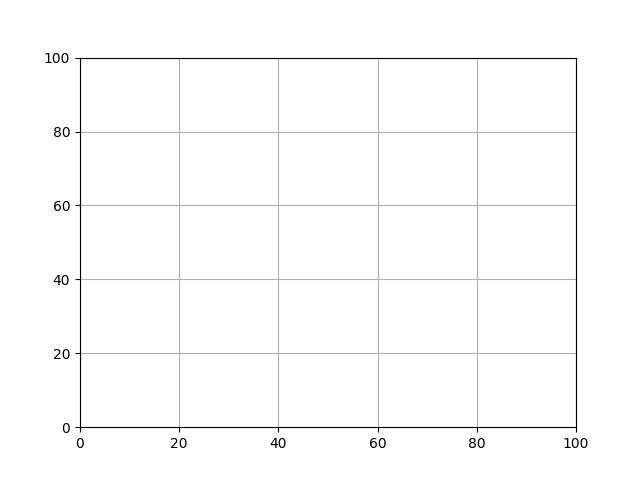

In [4]:
if __name__ == "__main__":
    plot = DraggablePlotExample()